概要：我从kaggle平台下载了牛油果价格数据集，准备从头分析一遍。
数据集下载地址：https://www.kaggle.com/neuromusic/avocado-prices/data

1.首先需要设置matplotlib绘图环境

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

2.导入牛油果价格数据。

In [4]:
import pandas as pd

AVOCADO_PATH = os.path.join("datasets", "avocado")

def load_avocado_data(avocado_path=AVOCADO_PATH):
    csv_path = os.path.join(avocado_path, "avocado.csv")
    return pd.read_csv(csv_path)

avocado = load_avocado_data()
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


3.分析数据。

In [5]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


特征包括日期，平均价格，总销量（个数），规格销售数量（4046,4225,4770），销售总包数，销售小包数，销售大包数，销售超大包数，类型（普通和有机），产地等。
样本的所有特征没有缺失值。

In [7]:
avocado["year"].value_counts().sort_values()

2018    1296
2015    5615
2016    5616
2017    5722
Name: year, dtype: int64

以上是牛油果的销售年份。

In [8]:
avocado["type"].value_counts().sort_values()

organic         9123
conventional    9126
Name: type, dtype: int64

类型分为有机和普通。

In [9]:
avocado["region"].value_counts().sort_values()

WestTexNewMexico       335
Tampa                  338
Philadelphia           338
Boise                  338
Albany                 338
RichmondNorfolk        338
Seattle                338
Syracuse               338
Indianapolis           338
SanDiego               338
Plains                 338
NorthernNewEngland     338
Orlando                338
HarrisburgScranton     338
Houston                338
Jacksonville           338
Roanoke                338
BuffaloRochester       338
CincinnatiDayton       338
Midsouth               338
GreatLakes             338
Charlotte              338
Nashville              338
Atlanta                338
BaltimoreWashington    338
Detroit                338
Columbus               338
TotalUS                338
RaleighGreensboro      338
NewYork                338
SouthCarolina          338
NewOrleansMobile       338
Denver                 338
LosAngeles             338
HartfordSpringfield    338
Sacramento             338
West                   338
M

产地不少，样本选择也比较平均。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001DC6F6D8>,
      dtype=object)

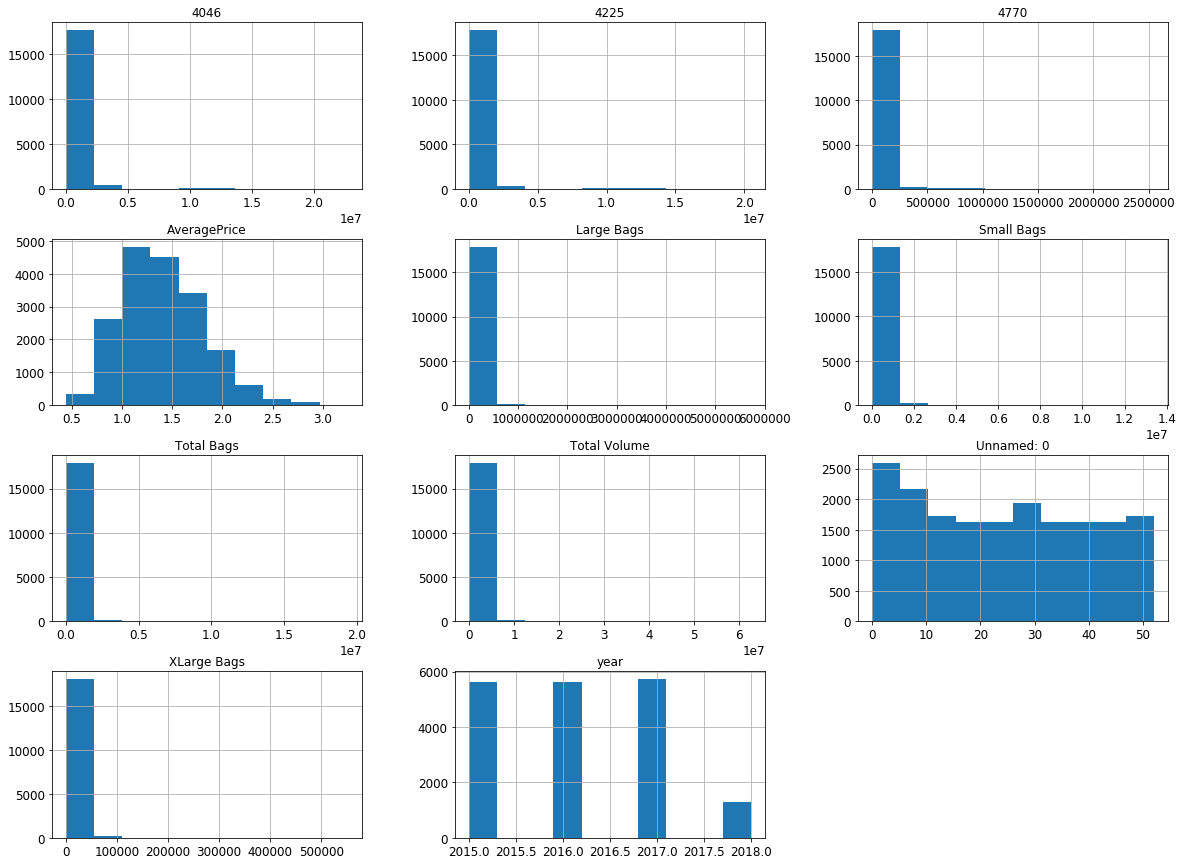

In [18]:
avocado.hist(bins=10, figsize=(20,15))

4046规格的牛油果，平均销量是29万只/样本，最高达到2200万只/样本,所以直方图显示大部分样本的销售额（只）是比较正常的。
总销量（Total Volume），4225规格和4770规格的也比较类似。
平均价格（AveragePrice）比较稳定，大部分样本的平均价格集中在0.8和2.2美元/只。
大袋（Large Bags）销售额最大值570万袋/样本，平均是5.4万袋/样本，其他袋装销售额类似。
样本年份包括2015-2018年，其中2018年样本较少。

In [12]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


4.相关性分析。

In [20]:
avocado_corr = avocado.corr()
avocado_corr

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [21]:
avocado_corr["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
year            0.093197
XLarge Bags    -0.117592
Unnamed: 0     -0.133008
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

4046规格的产品销量和平均价格呈负相关，说明该产品销量越大价格越低，总销量和价格也呈一定
的负相关性。
年份呈正相关性，说明这几年价格呈上升趋势。

5.我们用pandas图形化相关性，展示的特征有平均价格，4046规格产品销量，总销量，年份。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000024EBF278>,
      dtype=object)

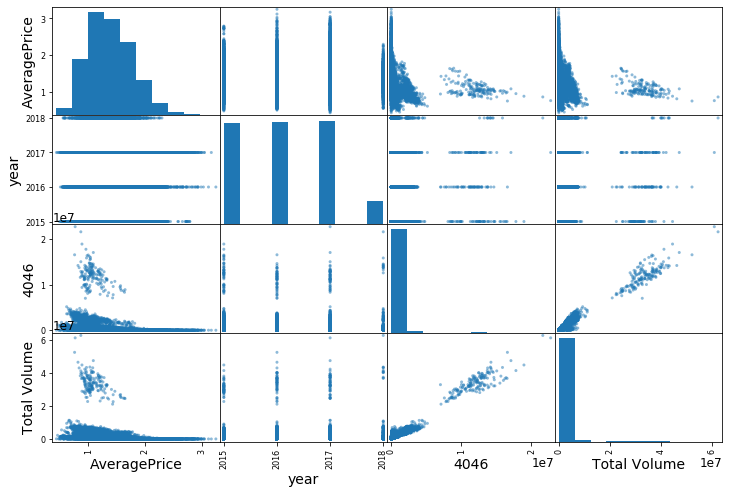

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["AveragePrice", "year", "4046",
              "Total Volume"]
scatter_matrix(avocado[attributes], figsize=(12, 8))

我们看到价格和销量的关系图，数据点不算分散，而且有一定的方向性。

[8, 63500000, 0.44, 3.25]

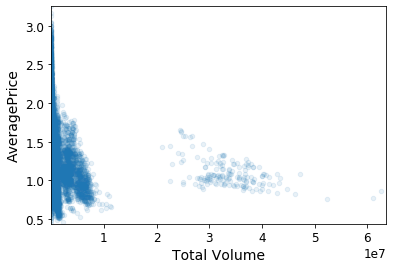

In [23]:
avocado.plot(kind="scatter", x="Total Volume", y="AveragePrice",
             alpha=0.1)
plt.axis([8, 63500000, 0.44, 3.25])